___

<a href='http://www.pieriandata.com'><img src='Pierian_Data_Logo.png'/></a>
___
<center><em>Copyright Pierian Data</em></center>

# Facebook Prophet Trend Changes of Hospitality Employees on Time Series Data

**By Drew Sims**

The following project was an exercise project given by Pierian Data in the Python for Time-series Data Science Bootcamp.

**The goal of this project is to determine the trend changes in the number of hospitality employees from 1990 through 2018 using Facebook's Prophet library.**

**The Steps are as followed:**

**1.)** Import Libraries

**2.)** Import CSV Data

**3.)** Explore Data

**4.)** Visualize Data

**5.)** Create Prophet Model

**6.)** Visualize Prophet Trend Changes

# 1.) Import Libraries

In [2]:
import pandas as pd
from fbprophet import Prophet
%matplotlib inline

# 2.) Import CSV Data

In [3]:
# Read in CSV data

df = pd.read_csv('..\\Data\\HospitalityEmployees.csv')

# 3.) Explore Data

In [8]:
# see start of dataframe. start date = '1990-01-01'

df.head(5)

,ds,y
0,1990-01-01,1064.5
1,1990-02-01,1074.5
2,1990-03-01,1090.0
3,1990-04-01,1097.4
4,1990-05-01,1108.7


In [9]:
# see end of dataframe. end date = '2018-12-01'

df.tail(5)

,ds,y
343,2018-08-01,2019.1
344,2018-09-01,1992.5
345,2018-10-01,1984.3
346,2018-11-01,1990.1
347,2018-12-01,2000.2


In [4]:
# Rename columns to correspond with Facebook Prophet
# Change data type of dates 'ds' column to datetime64 object

df.columns = ['ds','y']
df['ds'] = pd.to_datetime(df['ds'])

# 4.) Visualize Data

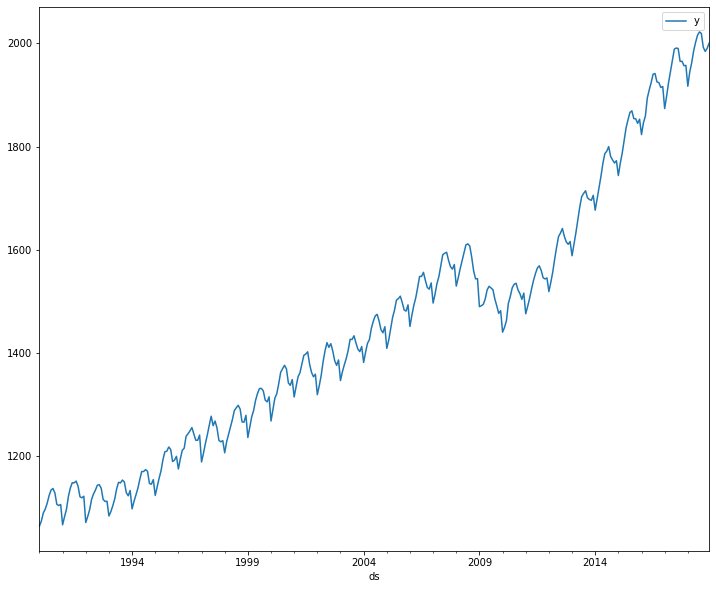

In [5]:
# One clear trend change around 2008
# Many trend changes occur but are not as apparent in this visualization

df.plot(x='ds',y='y',figsize=(12,10))

# 5.) Create Prophet Model

In [6]:
# Create Instance of Prophet
# Fit the Prophet Model
# Creates dates dataframe with dates for the training data length extended by however many periods you have
# Forecast future data (fill empty dates dataframe from 'future' with corresponding predicted values)

m = Prophet()
m.fit(df)
future = m.make_future_dataframe(periods=12,freq='MS')
forecast = m.predict(future)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


# 6.) Visualize Prophet Trend Changes

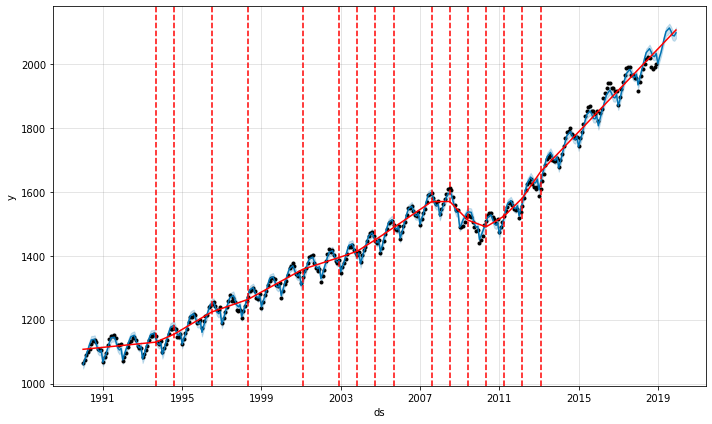

In [7]:
# import library
# plot the forecasted values
# show change points in the trend on the graph

from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(),m,forecast) # onto current axis of figure, onto model, and onto forecast

# no changes in trend from 2014